In [1]:
import sys
sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, plot, download_groups, MethodName, Group, PlotStyle
from wandb_downloader import RunsDownloader

In [3]:
wandb = RunsDownloader(project="support-matching")

In [4]:
prefix_suffix = {"metrics_prefix": "test/y_from_zy/", "metrics_suffix": " (pytorch_classifier)"}
data = download_groups(wandb, {
    "winter_pine_nih_sb10_gender_infiltration_sa2": Group(MethodName.ours_bag_oracle, **prefix_suffix),
    "nih_gender_infiltration_sb1_george_sa": Group(MethodName.george, "test/"),
})

'winter_pine_nih_sb10_gender_infiltration_sa2': found 24 runs.
'nih_gender_infiltration_sb1_george_sa': found 9 runs.


In [5]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 3.0),
    file_prefix="nih_sensitivity",
)

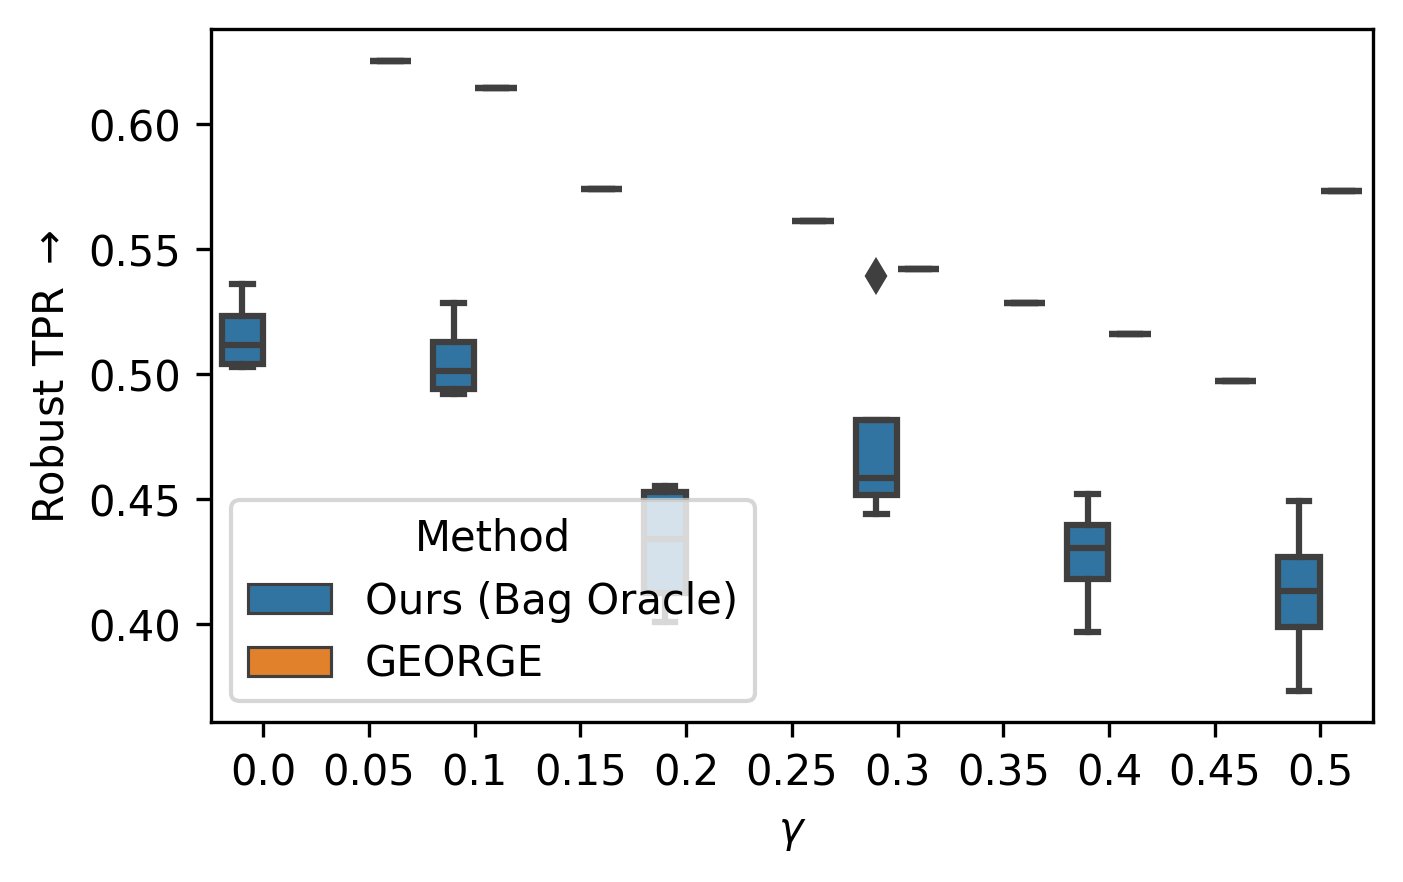

In [6]:
plot(
    data,
    groupby="labeller.level",
    metrics=[Metrics.rob_tpr],
    # x_limits=(0, 0.5),
    x_label="$\\gamma$",
    # plot_style=PlotStyle.lineplot,
    plot_style=PlotStyle.boxplot_hue,
    **plot_kwargs,
)